In [1]:
import pandas as pd

In [2]:
data = pd.ExcelFile("C:/Users/Lenovo/Downloads/ECOMM DATA.xlsx")

In [3]:
data.sheet_names

['Orders', 'Returns', 'People']

In [4]:
orders_df = data.parse('Orders')
orders_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
# Compute total sales
total_sales = orders_df['Sales'].sum()
total_sales

12642501.909880001

In [6]:
# Convert 'Order Date' to datetime format
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])

# Extract year and month from 'Order Date'
orders_df['Year'] = orders_df['Order Date'].dt.year
orders_df['Month'] = orders_df['Order Date'].dt.month

# Aggregate sales by year and month
monthly_sales = orders_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

monthly_sales.head()

,Year,Month,Sales
0,2011,1,98898.48886
1,2011,2,91152.15698
2,2011,3,145729.36736
3,2011,4,116915.76418
4,2011,5,146747.83610


In [7]:
#Analyze Sales Trends Over Time

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Aggregate sales by year and month
monthly_sales = orders_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a pivot table to facilitate plotting
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Sales')

<Figure size 1200x600 with 0 Axes>

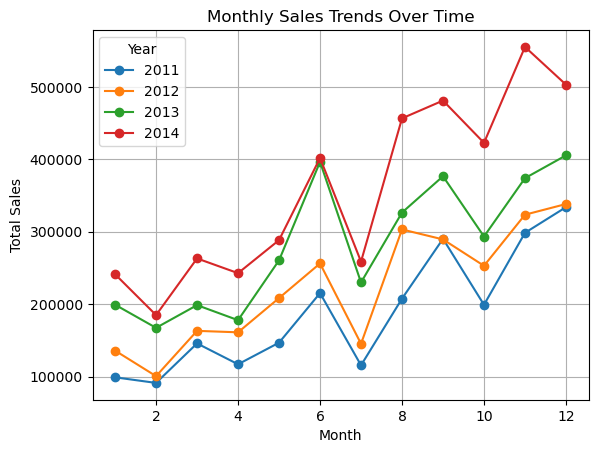

In [10]:
# Plot sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales_pivot.plot(marker='o')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [11]:
#Best-Selling Products

In [12]:
# Group by product name and sum sales
best_selling_products = orders_df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort products by total sales in descending order
best_selling_products = best_selling_products.sort_values(by='Sales', ascending=False)

print(best_selling_products.head(10))

                                           Product Name       Sales
310                        Apple Smart Phone, Full Size  86935.7786
970                        Cisco Smart Phone, Full Size  76441.5306
2415                    Motorola Smart Phone, Full Size  73156.3030
2501                       Nokia Smart Phone, Full Size  71904.5555
866               Canon imageCLASS 2200 Advanced Copier  61599.8240
1837         Hon Executive Leather Armchair, Adjustable  58193.4841
2631  Office Star Executive Leather Armchair, Adjust...  50661.6840
1714  Harbour Creations Executive Leather Armchair, ...  50121.5160
2988                      Samsung Smart Phone, Cordless  48653.4600
2502                  Nokia Smart Phone, with Caller ID  47877.7857


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

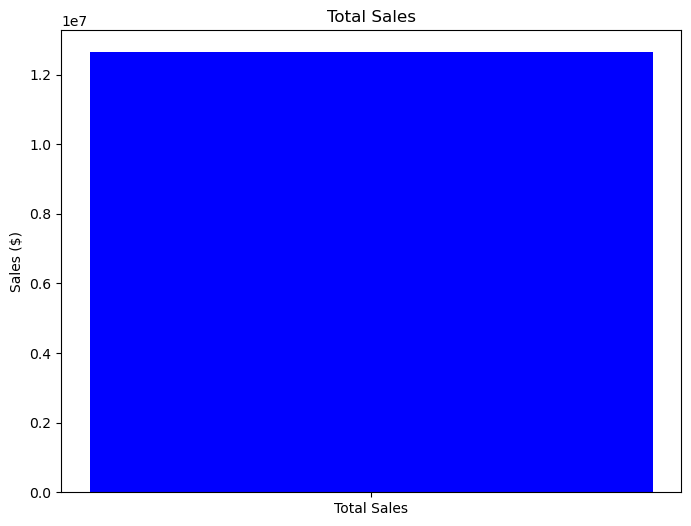

In [20]:
# Total Sales Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['Total Sales'], [total_sales], color='blue')
plt.title('Total Sales')
plt.ylabel('Sales ($)')
plt.show()